# Enhanced Support Vector Machine Analysis for Heart Disease

## 2. Data Preprocessing

In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data_path = "../data/heart_statlog_cleveland_hungary_final.csv"
heart_data = pd.read_csv(data_path)

# Features and target
X = heart_data.drop(columns=['MI'])
y = heart_data['MI']

# Train-test split for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    

## 3. SVM Classification (Predicting MI)

In [8]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# SVM Classifier
svc_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_svc = svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_report = classification_report(y_test, y_pred_svc)

print("SVM Classification Accuracy:", svc_accuracy)
print("Classification Report:\n", svc_report)
    

SVM Classification Accuracy: 0.8707865168539326
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        80
           1       0.86      0.92      0.89        98

    accuracy                           0.87       178
   macro avg       0.87      0.87      0.87       178
weighted avg       0.87      0.87      0.87       178



## 5. Confusion Matrix

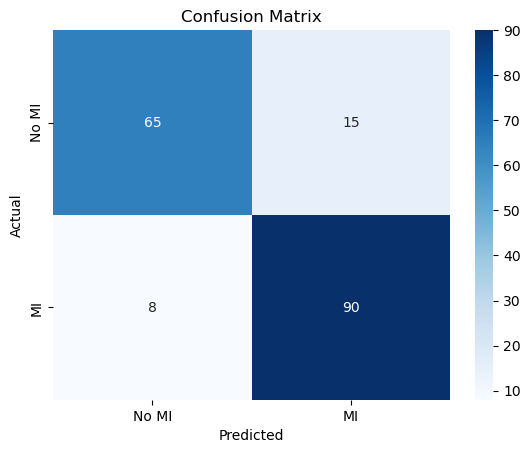

In [11]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No MI', 'MI'], yticklabels=['No MI', 'MI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
    

## 6. ROC Curve and AUC

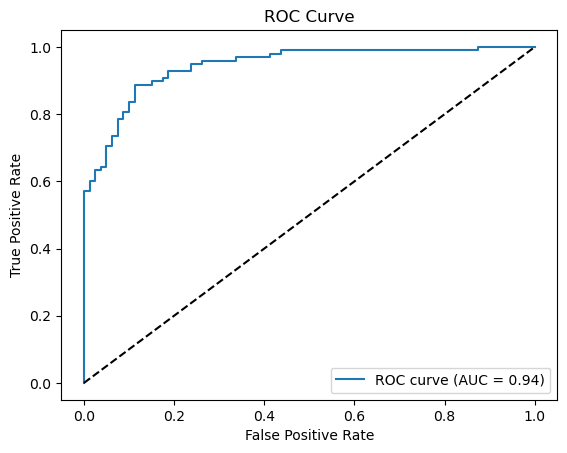

In [13]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, svc_model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
    

## 7. Hyperparameter Tuning (Grid Search)

In [15]:

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
    

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validated Accuracy: 0.8591549295774648
